<img src="imgs/datamecum_logo.png" align="right" style="float" width="400">
<font color="#CA3532"><h1 align="left">Programa técnico intensivo en data science. Datamecum.</h1></font>
<font color="#6E6E6E"><h2 align="left">Módulo de visualización.</h2></font> 
<font color="#6E6E6E"><h2 align="left">Streamlit.</h2></font> 

#### Ángel González Muelas, Juan Gómez-Sanchis

## Nota aclaratoria

Por el momento, Jupyter no tiene compatibilidad directa con los módulos de Streamlit. Si probáis a ejecutar cualquier aplicación desde este Notebook, veréis que la ejecución será correcta, pero no se abrirá ninguna pestaña en el navegador.

Por ello, os recomendamos hacer los ejercicios que requieran el uso de Streamlit en archivos `.py` separados, y cuando os funcione lo que estéis haciendo, copiar la solución a este Notebook. Recordad que el procedimiento para iniciar cualquier aplicación, es el siguiente:

1. Abrimos una consola y ponemos `cd nombre_ruta` para situarnos en la carpeta que contiene la aplicación.

2. Seleccionamos el entorno que vamos a usar y que tenga alguna versión de Streamlit instalada, con `conda activate nombre_enviroment`.

3. Ejecutamos la aplicación, con `streamlit run nombre_app.py`.

Nota: Si no se abre el navegador con la aplicación, abrir el navegador manualmente y poner `http://localhost:8501`.

<img src="imgs/captura_init.png"  width="400">

## Introducción

En esta sesión, vamos a poner en práctica todos los conceptos aprendidos en la teoría de cuadros de mando con Streamlit, además de practicar con otros conceptos vistos en otras sesiones, como la carga de archivos o visualización con librería `Matplotlib`.

En esta prática vamos a usar el dataframe de datos `Weather` en la carpeta `datos`, que contiene el registro de varias medidas meteorológicas diarias (temperatura y precipitación) registradas en los aeropuertos de Bajaras (Madrid), El Prat (Barcelona) y Manises (Valencia) entre los años 1980 y 2019. Estos datos se han descargado desde la página https://www.ncdc.noaa.gov/cdo-web/search de la NOAA (National Oceanic and Atmospheric Administration) de los EE.UU.

### Ejercicio inicial

Carga el dataset proporcionado en Python. Recuerda revisar que los tipos de las columnas que se importan sean los correctos. Este conjunto de datos, está formado por las siguientes columnas:

 - `STATION`: Estación meteorológica (Factor)
 - `DATE`: Fecha del registro (Date)
 - `PRCP`: Precipitación acumulada diaria (num)
 - `TAVG`: Temperatura media diaria (num)
 - `TMAX`: Temperatura máxima (num)
 - `TMIN`: Temperatura mínima (num)

- Muestra el número de registros del conjunto de datos y los tipos de cada una de las columnas. 

In [1]:
import pandas as pd
datos = pd.read_csv("./datos/VMB_weather.csv")
print(len(datos))
datos.info()

43795
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43795 entries, 0 to 43794
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  43795 non-null  object 
 1   DATE     43795 non-null  object 
 2   PRCP     40953 non-null  float64
 3   TAVG     43729 non-null  float64
 4   TMAX     39662 non-null  float64
 5   TMIN     37606 non-null  float64
dtypes: float64(4), object(2)
memory usage: 2.0+ MB


- Como podrás observar, la columna `DATE` es un objeto que está formado con cadenas de caracteres de fecha. Si queremos hacer representaciones, deberemos decirle de manera explícita que se tratan de fechas y no de caracteres. Cambia los valores de la columna `DATE` a un formato de fecha válido y verifica que se han cambiado correctamente.

In [2]:
type(datos.DATE[0])

str

In [3]:
datos.DATE = pd.to_datetime(datos.DATE)
type(datos.DATE[0])

pandas._libs.tslibs.timestamps.Timestamp

- ¿Existe alguna variable que tenga datos faltantes? En caso afirmativo, muestra el número de registros faltantes en cada variable y una tabla en la que se muestre el registro entero. En caso negativo, pasa al siguiente punto.

In [4]:
datos.isnull().sum()

STATION       0
DATE          0
PRCP       2842
TAVG         66
TMAX       4133
TMIN       6189
dtype: int64

In [35]:
datos.loc[datos.isnull().sum(axis = 1) > 0]

STATION       DATE  PRCP  TAVG  TMAX  TMIN
6       Valencia 1980-01-07   0.0   6.3  14.0   NaN
7       Valencia 1980-01-08   0.0   5.8  13.0   NaN
9       Valencia 1980-01-10   0.0   8.9  14.0   NaN
14      Valencia 1980-01-15   6.1   8.9  14.0   NaN
22      Valencia 1980-01-23   NaN  13.8   NaN  10.0
...          ...        ...   ...   ...   ...   ...
43390  Barcelona 2018-11-22   0.0   NaN  18.3   8.7
43565  Barcelona 2019-05-16   1.2   NaN  19.3  10.9
43566  Barcelona 2019-05-17  36.7   NaN  17.9  12.2
43567  Barcelona 2019-05-18   0.0   NaN  19.9  12.5
43568  Barcelona 2019-05-19   1.0   NaN  18.3  11.0

[9663 rows x 6 columns]

- Muestra una tabla en la que obtengas el número de registros por estación (variable `STATION`) y por las otras demás variables.

In [9]:
datos.groupby('STATION').count()

DATE   PRCP   TAVG   TMAX   TMIN
STATION                                     
Barcelona  14610  14582  14577  14581  14581
Madrid     14610  14609  14577  14604  14604
Valencia   14575  11762  14575  10477   8421

### Ejercicio 1

Antes de empezar a crear la aplicación, debemos saber qué tipo de representaciones verán a los usuarios. 

- Primero, muestra un gráfico de evolución que represente la temperatura media para toda la serie, con un color distinto para cada una de las estaciones usando la librería `Matplotlib`. Añadiremos un poco de transparencia a estas tres evoluciones. Además, también queremos ver una media móvil de la serie por zona, para observar las tendencias más generales de las series. Para ello, vamos a usar la función `ewm` implementada en Pandas https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html. En ella, seleccionaremos un $\alpha = 0.001$. Este determina el grado de suavizado que queremos obtener. Si $\alpha = 1$ no se producirá nada de suavizado, por lo que su resultado serán los mismos que los valores originales. En cambio, si $\alpha$ es un valor cercano a 0 (no puede ser igual), se producirá mucho suavizado.

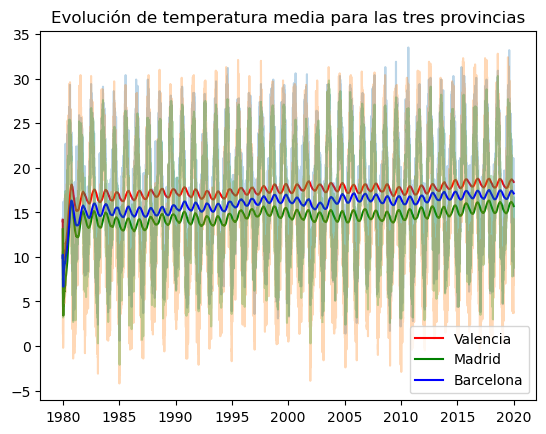

In [10]:
colores = {'Valencia' : 'red', 'Madrid' : 'green', 'Barcelona' : 'blue'}

import matplotlib.pyplot as plt

for var_estacion in datos.STATION.unique():
    datos_filtrados = datos.loc[datos.STATION == var_estacion]
    ewm = datos_filtrados.TAVG.ewm(alpha=0.001).mean()

    plt.plot(datos_filtrados.DATE, ewm, c = colores[var_estacion], label = var_estacion)
    plt.plot(datos_filtrados.DATE, datos_filtrados.TAVG,  alpha = 0.3)
    
plt.legend()
plt.title("Evolución de temperatura media para las tres provincias")
plt.show()

- ¿Porqué crees que al principio de las tres series, el `ewm` tiene oscilaciones distintas en comparación a sus sucesivos años?

Con la función `ewm` se crea una ventana móvil que va creciendo a lo largo de la serie. Al principio, esta ventana debe ser más pequeña y conforme va pasando por la serie, se hace más grande. Es por esa razón que el `ewm` se parece más a la serie original en los primeros instantes temporales.

- Ahora vamos a filtrar los datos por la estación de `Madrid`. Queremos representar la precipitación acumulada por año (recuerda que está por día). Esta serie, también tendrá su media móvil asociada, con la función `ewm`.

In [13]:
precipitacion.index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='DATE')

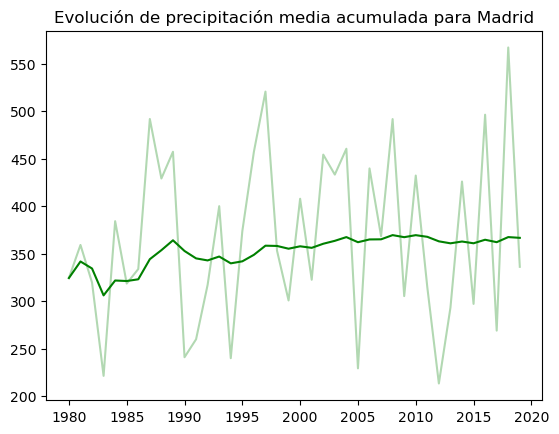

In [22]:
import matplotlib.pyplot as plt

var_estacion = 'Madrid'
colores = {'Valencia' : 'red', 'Madrid' : 'green', 'Barcelona' : 'blue'}

datos_filtrados = datos.loc[datos.STATION == var_estacion]
precipitacion = datos_filtrados.PRCP.groupby(datos_filtrados.DATE.dt.year).sum()
anos = pd.to_datetime(precipitacion.index, format="%Y")
ewm = precipitacion.ewm(alpha=0.001).mean()

plt.plot(anos, ewm, c = colores[var_estacion], label = var_estacion)
plt.plot(anos, precipitacion, c = colores[var_estacion], alpha = 0.3)

plt.title("Evolución de precipitación media acumulada para Madrid")
plt.show()

## Entradas en Streamlit

### Ejercicio 2

Un cuadro de mando con Streamlit es un archivo de Python interactivo formado por dos elementos:
- *Interfaz de usuario*: define las entradas y salidas de la aplicación, así como la disposición (*layout*) de estos.
- *Lógica de servidor*: define los cálculos que hay que hacer sobre las entradas para mostrar las salidas.

Las **entradas** son los elementos que permiten la entrada de datos por parte del usuario para modificar el comportamiento de la aplicación.

Vamos a definir algunas entradas usando nuestro conjunto de datos.

- Crea un multi-selector con las estaciones del dataframe y selecciona por defecto la seguna opción.

<img src="imgs/buttons.jpg" width="800">

In [ ]:
import streamlit as st

st.multiselect("Ciudad", options = ['Valencia', 'Madrid', 'Barcelona'], default = 'Madrid')

- Crea un selector de rango de fechas que permita elegir un rango entre dos fechas con una resolución de minutos. En los textos de dicho selector, no se deberán mostrar los segundos.

<img src="imgs/slider.jpg" width="800">

In [18]:
import streamlit as st
from datetime import datetime, timedelta

st.slider("Selecciona fechas:", 
          min_value = datetime.strptime('2022-09-04 03:02:00', '%Y-%m-%d %H:%M:%S'),
          max_value = datetime.strptime('2022-11-04 03:02:00', '%Y-%m-%d %H:%M:%S'),
          step = timedelta(minutes=1),
          format = "DD/MM/YYYY hh:mm",
          value = datetime.strptime('2022-10-04 03:02:00', '%Y-%m-%d %H:%M:%S'))

datetime.datetime(2022, 10, 4, 3, 2)

- Crea un selector numérico mediante slider con el rango de 0 a 1 y un valor inicial de 0.5 y una resolución de 0.0001. El texto del selector deberá de mostrar los 4 decimales.

<img src="imgs/slider_alfa.jpg" width="800">

In [45]:
import streamlit as st
st.slider("Selecciona alfa", format = r"%g", min_value = 0.0, max_value = 1.0, value = 0.01, step = 0.0001)

0.01

## Salidas en Streamlit

Las **salidas** son los elementosde la aplicación que muestran un objeto como resultado de nuestra interacción con las entradas. Estos objetos pueden ser figuras, texto, tablas, etc.  
Las salidas se definen dentro de los métodos de Streamlit, `st`. Por ejemplo si queremos mostrar una gráfica interactiva en nuestro documento tenemos que llamar al método `st.pyplot()`.

Una vez hemos creado las entradas y salidas del documento, debemos crear el código que genera el contenido de cada salida a partir de las entradas del usuario. Para ello, todas las funciones de entrada, presentan el argumento `key`, con el que guardar toda la información que queramos en `session_state`.

### Ejercicio 3

Crea una aplicación que muestre la temperatura media de la Estación o estaciones seleccionadas por el Radio Button del ejercicio 2 punto 1.

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Datos
datos = pd.read_csv("./datos/VMB_weather.csv")
datos.DATE = pd.to_datetime(datos.DATE)

colores = {'Valencia' : 'red', 'Madrid' : 'green', 'Barcelona' : 'blue'}

# Main
var_estaciones = st.multiselect("Ciudad", options = datos.STATION.unique(), default = datos.STATION.unique()[1])
fig, ax = plt.subplots(ncols = 1)

for var_estacion in var_estaciones:
    datos_filtrados = datos.loc[datos.STATION == var_estacion]
    precipitacion = datos_filtrados.PRCP.groupby(datos_filtrados.DATE.dt.year).sum()
    anos = pd.to_datetime(precipitacion.index, format="%Y")
    ewm = precipitacion.ewm(alpha=0.001).mean()

    ax.plot(anos, ewm, c = colores[var_estacion], label = var_estacion)
    ax.plot(anos, precipitacion, c = colores[var_estacion],  alpha = 0.3)
    
ax.legend()
ax.set_title("Evolución de temperatura media para las tres provincias")
st.pyplot(fig)

## Interfaz de usuario

El conjunto de las entradas y salidas definen la interfaz de usuario del documento. La manera en que se disponen los distintos elementos en la interfaz configuran la disposición (*layout*) del cuadro de mandos en Python. Streamlit tiene una serie de funciones que permiten definir el  *layout* de esta interfaz.
Por defecto, si no se especifica nada, Streamlit dispone los elementos de la interfaz apilados en vertical.

### Ejercicio 4

Crea una interfaz con un selector de tipo Radio Button con todas las estaciones del Dataframe, y muestra para la temperatura media. Añade un "checkbox" para activar o no la tendencia (`ewm`) de los valores y un slider para seleccionar un valor $\alpha$ de suavizado.

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Datos
datos = pd.read_csv("./datos/VMB_weather.csv")
datos.DATE = pd.to_datetime(datos.DATE)

colores = {'Valencia' : 'red', 'Madrid' : 'green', 'Barcelona' : 'blue'}

# Main
var_estaciones = st.multiselect("Ciudad", options = datos.STATION.unique(), default = datos.STATION.unique()[1])
alpha = st.slider("Selecciona alfa", format = r"%g", min_value = 0.0, max_value = 1.0, value = 0.01, step = 0.0001)
check = st.checkbox("Activa alfa")
fig, ax = plt.subplots(ncols = 1)

for var_estacion in var_estaciones:
    datos_filtrados = datos.loc[datos.STATION == var_estacion]
    ewm = datos_filtrados.TAVG.ewm(alpha=alpha).mean()

    if check:
        ax.plot(datos_filtrados.DATE, ewm, c = colores[var_estacion], label = var_estacion)
    ax.plot(datos_filtrados.DATE, datos_filtrados.TAVG,  alpha = 0.3)
    
ax.legend()
ax.set_title("Evolución de temperatura media para las tres provincias")
st.pyplot(fig)

- ¿Qué pasa si $\alpha\equiv 0$? Modifica el código para soportar este extremo y que salga un mensaje de "warning".

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Datos
datos = pd.read_csv("./datos/VMB_weather.csv")
datos.DATE = pd.to_datetime(datos.DATE)

colores = {'Valencia' : 'red', 'Madrid' : 'green', 'Barcelona' : 'blue'}

# Main
var_estaciones = st.multiselect("Ciudad", options = datos.STATION.unique(), default = datos.STATION.unique()[1])
alpha = st.slider("Selecciona alfa", format = r"%g", min_value = 0.0, max_value = 1.0, value = 0.01, step = 0.0001)
check = st.checkbox("Activa alfa")

if alpha > 0:
    fig, ax = plt.subplots(ncols = 1)

    for var_estacion in var_estaciones:
        datos_filtrados = datos.loc[datos.STATION == var_estacion]
        ewm = datos_filtrados.TAVG.ewm(alpha=alpha).mean()

        if check:
            ax.plot(datos_filtrados.DATE, ewm, c = colores[var_estacion], label = var_estacion)
        ax.plot(datos_filtrados.DATE, datos_filtrados.TAVG,  alpha = 0.3)
        
    ax.legend()
    ax.set_title("Evolución de temperatura media para las tres provincias")
    st.pyplot(fig)
else:
    st.warning("Alfa no puede ser exactamente igual a 0.")

## Disposición de los elementos de la aplicación

Hasta ahora, cada vez que añadíamos un elemento, quedaba dispuesto de manera vertical. Existen varias opciones:

- `siderbar`: es una barra lateral colapsable que se se añadirá automáticamente a la aplicación cuando sea usada. Normalmente, se usa para poner todos los filtros presentes en ella.

- `columns` inserta contenedores uno al lado del otro y devuelve una lista de columnas, que se usarán para ir poniendo los elementos que queramos. Es muy recomendable usar la sintaxis "`with()`". Recordemos que el ancho será proporcional a los números que hayan en la lista que le pasemos como parámetro.

- `tab` inserta contenedores en tabs separadas. En cada uno de ellos podemos poner cuantos elementos queramos.  Es muy recomendable usar la sintaxis "`with()`".

- `expander` inserta un contenedor en la aplicación que se puede usar para contener varios elemento, pudiendo ser colapsado o contraído. Cuando se contrae, lo único visible es la etiqueta proporcionada.  Es muy recomendable usar la sintaxis "`with()`".

- `container` inserta un contenedor invisible en la aplicación que se puede usar para contener varios elementos.

- `empty` inserta un contenedor en la aplicación que se puede usar para contener un solo elemento. Esto permite, por ejemplo, eliminar elementos en cualquier punto o reemplazar varios elementos a la vez (utilizando un contenedor secundario de varios elementos).


## Ejercicio 5

- Modifica el cuadro de mando del ejercicio 4 para dejar el gráfico en el panel principal y los filtros en el sidebar.

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Datos
datos = pd.read_csv("./datos/VMB_weather.csv")
datos.DATE = pd.to_datetime(datos.DATE)

colores = {'Valencia' : 'red', 'Madrid' : 'green', 'Barcelona' : 'blue'}

# Sidebar
with st.sidebar:
    var_estaciones = st.multiselect("Ciudad", options = datos.STATION.unique(), default = datos.STATION.unique()[1])
    alpha = st.slider("Selecciona alfa", format = "%g", min_value = 0.0, max_value = 1.0, value = 0.01, step = 0.0001)
    check = st.checkbox("Activa alfa")

# Main
if alpha > 0:
    fig, ax = plt.subplots(ncols = 1)

    for var_estacion in var_estaciones:
        datos_filtrados = datos.loc[datos.STATION == var_estacion]
        ewm = datos_filtrados.TAVG.ewm(alpha=alpha).mean()

        if check:
            ax.plot(datos_filtrados.DATE, ewm, c = colores[var_estacion], label = var_estacion)
        ax.plot(datos_filtrados.DATE, datos_filtrados.TAVG,  alpha = 0.3)
        
    ax.legend()
    ax.set_title("Evolución de temperatura media para las tres provincias")
    st.pyplot(fig)
else:
    st.warning("Alfa no puede ser exactamente igual a 0.")

- Añade diferentes tabs, para las precipitaciones y para cada una de las temperaturas.

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Datos
datos = pd.read_csv("./datos/VMB_weather.csv")
datos.DATE = pd.to_datetime(datos.DATE)

colores = {'Valencia' : 'red', 'Madrid' : 'green', 'Barcelona' : 'blue'}

# Sidebar
with st.sidebar:
    var_estaciones = st.multiselect("Ciudad", options = datos.STATION.unique(), default = datos.STATION.unique()[1])
    alpha = st.slider("Selecciona alfa", format = "%g", min_value = 0.0, max_value = 1.0, value = 0.01, step = 0.0001)
    check = st.checkbox("Activa alfa")

# Main
if alpha > 0:
    tab1, tab2, tab3, tab4 = st.tabs(["Precip", "Temp. miníma", "Temp. media", "Temp. máxima"])

    with tab1:
        fig, ax = plt.subplots(ncols = 1)

        for var_estacion in var_estaciones:
            datos_filtrados = datos.loc[datos.STATION == var_estacion]
            ewm = datos_filtrados.PRCP.ewm(alpha=alpha).mean()

            if check:
                ax.plot(datos_filtrados.DATE, ewm, c = colores[var_estacion], label = var_estacion)
            ax.plot(datos_filtrados.DATE, datos_filtrados.PRCP, c = colores[var_estacion],  alpha = 0.3)

        ax.legend()
        ax.set_title("Evolución de precipitación para las tres provincias")
        st.pyplot(fig)

    with tab2:
        fig, ax = plt.subplots(ncols = 1)

        for var_estacion in var_estaciones:
            datos_filtrados = datos.loc[datos.STATION == var_estacion]
            ewm = datos_filtrados.TMIN.ewm(alpha=alpha).mean()

            if check:
                ax.plot(datos_filtrados.DATE, ewm, c = colores[var_estacion], label = var_estacion)
            ax.plot(datos_filtrados.DATE, datos_filtrados.TMIN, c = colores[var_estacion],  alpha = 0.3)
            
        ax.legend()
        ax.set_title("Evolución de temperatura mínima para las tres provincias")
        st.pyplot(fig)

    with tab3:
        fig, ax = plt.subplots(ncols = 1)

        for var_estacion in var_estaciones:
            datos_filtrados = datos.loc[datos.STATION == var_estacion]
            ewm = datos_filtrados.TAVG.ewm(alpha=alpha).mean()

            if check:
                ax.plot(datos_filtrados.DATE, ewm, c = colores[var_estacion], label = var_estacion)
            ax.plot(datos_filtrados.DATE, datos_filtrados.TAVG, c = colores[var_estacion],  alpha = 0.3)
            
        ax.legend()
        ax.set_title("Evolución de temperatura media para las tres provincias")
        st.pyplot(fig)

    with tab4:
        fig, ax = plt.subplots(ncols = 1)

        for var_estacion in var_estaciones:
            datos_filtrados = datos.loc[datos.STATION == var_estacion]
            ewm = datos_filtrados.TMAX.ewm(alpha=alpha).mean()

            if check:
                ax.plot(datos_filtrados.DATE, ewm, c = colores[var_estacion], label = var_estacion)
            ax.plot(datos_filtrados.DATE, datos_filtrados.TMAX, c = colores[var_estacion],  alpha = 0.3)
            
        ax.legend()
        ax.set_title("Evolución de temperatura máxima para las tres provincias")
        st.pyplot(fig)

else:
    st.warning("Alfa no puede ser exactamente igual a 0.")

Podemos optimizar las líneas de código de la siguiente manera:

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Datos
datos = pd.read_csv("./datos/VMB_weather.csv")
datos.DATE = pd.to_datetime(datos.DATE)


def pon_grafico(datos, var_estaciones, nombre_variable, titulo, check):

    fig, ax = plt.subplots(ncols = 1)

    for var_estacion in var_estaciones:
        datos_filtrados = datos.loc[datos.STATION == var_estacion]
        ewm = datos_filtrados[nombre_variable].ewm(alpha=alpha).mean()

        if check:
            ax.plot(datos_filtrados.DATE, ewm, c = colores[var_estacion], label = var_estacion)
        ax.plot(datos_filtrados.DATE, datos_filtrados[nombre_variable], c = colores[var_estacion],  alpha = 0.3)

    ax.legend()
    ax.set_title(titulo)
    st.pyplot(fig)
    return


colores = {'Valencia' : 'red', 'Madrid' : 'green', 'Barcelona' : 'blue'}

# Sidebar
with st.sidebar:
    var_estaciones = st.multiselect("Ciudad", options = datos.STATION.unique(), default = datos.STATION.unique()[1])
    alpha = st.slider("Selecciona alfa", format = "%g", min_value = 0.0, max_value = 1.0, value = 0.01, step = 0.0001)
    check = st.checkbox("Activa alfa")

# Main
if alpha > 0:
    tab1, tab2, tab3, tab4 = st.tabs(["Precip", "Temp. miníma", "Temp. media", "Temp. máxima"])

    with tab1:
        pon_grafico(datos, var_estaciones, "PRCP", "Evolución de precipitación para las tres provincias", check)

    with tab2:
        pon_grafico(datos, var_estaciones, "TMIN", "Evolución de temperatura mínima para las tres provincias", check)

    with tab3:
        pon_grafico(datos, var_estaciones, "TAVG", "Evolución de temperatura media para las tres provincias", check)

    with tab4:
        pon_grafico(datos, var_estaciones, "TMAX", "Evolución de temperatura máxima para las tres provincias", check)

else:
    st.warning("Alfa no puede ser exactamente igual a 0.")

- Añade un botón para visualizar los datos una vez se hayan decidido los filtros.

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Datos
datos = pd.read_csv("./datos/VMB_weather.csv")
datos.DATE = pd.to_datetime(datos.DATE)

colores = {'Valencia' : 'red', 'Madrid' : 'green', 'Barcelona' : 'blue'}

def pon_grafico(datos, var_estaciones, nombre_variable, titulo, check):

    fig, ax = plt.subplots(ncols = 1)

    for var_estacion in var_estaciones:
        datos_filtrados = datos.loc[datos.STATION == var_estacion]
        ewm = datos_filtrados[nombre_variable].ewm(alpha=alpha).mean()

        if check:
            ax.plot(datos_filtrados.DATE, ewm, c = colores[var_estacion], label = var_estacion)
        ax.plot(datos_filtrados.DATE, datos_filtrados[nombre_variable], c = colores[var_estacion],  alpha = 0.3)

    ax.legend()
    ax.set_title("Evolución de precipitación para las tres provincias")
    st.pyplot(fig)
    return

# Sidebar
with st.sidebar:
    with st.form("filtros"):
        var_estaciones = st.multiselect("Ciudad", options = datos.STATION.unique(), default = datos.STATION.unique()[1])
        alpha = st.slider("Selecciona alfa", format = "%g", min_value = 0.0, max_value = 1.0, value = 0.01, step = 0.0001)
        check = st.checkbox("Activa alfa")
        filtra_info = st.form_submit_button("Actualizar gráficos")

# Main
if alpha > 0:
    tab1, tab2, tab3, tab4 = st.tabs(["Precip", "Temp. miníma", "Temp. media", "Temp. máxima"])

    if filtra_info:
        with tab1:
            pon_grafico(datos, var_estaciones, "PRCP", "Evolución de precipitación para las tres provincias", check)

        with tab2:
            pon_grafico(datos, var_estaciones, "TMIN", "Evolución de temperatura mínima para las tres provincias", check)

        with tab3:
            pon_grafico(datos, var_estaciones, "TAVG", "Evolución de temperatura media para las tres provincias", check)

        with tab4:
            pon_grafico(datos, var_estaciones, "TMAX", "Evolución de temperatura máxima para las tres provincias", check)

else:
    st.warning("Alfa no puede ser exactamente igual a 0.")

- Añade un entrada explanatoria (caption) que sea colapsable y que muestre un hipervínculo a la página web solamente de las ciudades que hayan sido seleccionadas, tanto en las precipitaciones como en las temperaturas.

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Datos
datos = pd.read_csv("./datos/VMB_weather.csv")
datos.DATE = pd.to_datetime(datos.DATE)

colores = {'Valencia' : 'red', 'Madrid' : 'green', 'Barcelona' : 'blue'}

def pon_grafico(datos, var_estaciones, nombre_variable, titulo, check):

    fig, ax = plt.subplots(ncols = 1)

    for var_estacion in var_estaciones:
        datos_filtrados = datos.loc[datos.STATION == var_estacion]
        ewm = datos_filtrados[nombre_variable].ewm(alpha=alpha).mean()

        if check:
            ax.plot(datos_filtrados.DATE, ewm, c = colores[var_estacion], label = var_estacion)
        ax.plot(datos_filtrados.DATE, datos_filtrados[nombre_variable], c = colores[var_estacion],  alpha = 0.3)

    ax.legend()
    ax.set_title("Evolución de precipitación para las tres provincias")
    st.pyplot(fig)
    return

# Sidebar
with st.sidebar:
    with st.form("filtros"):
        var_estaciones = st.multiselect("Ciudad", options = datos.STATION.unique(), default = datos.STATION.unique()[1])
        alpha = st.slider("Selecciona alfa", format = "%g", min_value = 0.0, max_value = 1.0, value = 0.01, step = 0.0001)
        check = st.checkbox("Activa alfa")
        filtra_info = st.form_submit_button("Actualizar gráficos")

# Main
if alpha > 0:
    tab1, tab2, tab3, tab4 = st.tabs(["Precip", "Temp. miníma", "Temp. media", "Temp. máxima"])

    if filtra_info:
        with tab1:
            pon_grafico(datos, var_estaciones, "PRCP", "Evolución de precipitación para las tres provincias", check)

        with tab2:
            pon_grafico(datos, var_estaciones, "TMIN", "Evolución de temperatura mínima para las tres provincias", check)

        with tab3:
            pon_grafico(datos, var_estaciones, "TAVG", "Evolución de temperatura media para las tres provincias", check)

        with tab4:
            pon_grafico(datos, var_estaciones, "TMAX", "Evolución de temperatura máxima para las tres provincias", check)

        with st.expander("Más información"):
            for var_estacion in var_estaciones: 
                st.write("https://es.wikipedia.org/wiki/" + var_estacion)

else:
    st.warning("Alfa no puede ser exactamente igual a 0.")

# Ejercicio 6

Ahora, vamos a hacer otra aplicación. Nos olvidamos del conjunto de datos anterior. El objetivo principal de algunas aplicaciones no es la de representar gráficos bonitos en los que se vean variaciones, por ejemplo. Su objetivo es permitir ejecutar procesos dadas unas entradas sin necesidad de abrir el código o incluso sin necesidad de conocer Python u otros lenguajes de programación. En este apartado es desarrollar un conversor de unidades.

- Crea una aplicación de Streamlit que tenga dos inputs numéricos. Uno de ellos hará referencia a los Megabytes y otro a Mebibytes. De manera automática y sin necesidad de tener un botón de visualizar, cuando introduzcamos una cantidad de Megabytes o Mebibytes, el otro selector se deberá actualizar mostrando la cantidad equivalente en la unidad que no hemos seleccionado.

In [ ]:
import streamlit as st

# Callbacks
def mb_a_mib():
    st.session_state.mib_key = st.session_state.mb_key * (10**6 / 2**20)
def mib_a_mb():
    st.session_state.mb_key = st.session_state.mib_key / (10**6 / 2**20)

# Main
st.title("Conversor de MiB a MB")
mb = st.number_input("MB", key = "mb_key", on_change = mb_a_mib)
mib = st.number_input("MiB", key = "mib_key", on_change = mib_a_mb)
st.write(st.session_state)

- Generalicemos nuestro conversor de unidades. Ahora, queremos poder pasar desde cualquier unidad de Bytes Binarios (MiB, TiB, ...)  a cualquier unidad de Bytes decimales. En https://es.wikipedia.org/wiki/Mebibyte tienes una tabla en la que se muestran estas relaciones. 

In [ ]:
import streamlit as st
# Iniciamos
prefijo = ["_", "K", "M", "G", "T", "P", "E", "Z", "Y"]

# Callbacks
def bytes_a_bibytes():
    fct_byte = [indice for indice, valor in enumerate(prefijo) if valor == st.session_state.byte_select_key[0]]
    fct_bibyte = [indice for indice, valor in enumerate(prefijo) if valor == st.session_state.bibyte_select_key[0]]
    st.session_state.bibyte_key = st.session_state.byte_key * (10**(3 * fct_byte[0]) / 2**(10 * fct_bibyte[0]))
def bibytes_a_bytes():
    fct_byte = [indice for indice, valor in enumerate(prefijo) if valor == st.session_state.byte_select_key[0]]
    fct_bibyte = [indice for indice, valor in enumerate(prefijo) if valor == st.session_state.bibyte_select_key[0]]
    st.session_state.byte_key = st.session_state.bibyte_key / (10**(3 * fct_byte[0]) / 2**(10 * fct_bibyte[0])) 

# Main
st.title("Bibyte a byte y viceversa")

col1, col2 = st.columns([6, 6])

with col1:
    uds_Bytes = st.selectbox("Selecciona unidad en Bytes", [i + "B" for i in prefijo], key = "byte_select_key")
    byte = st.number_input(uds_Bytes, key = "byte_key", on_change = bytes_a_bibytes)

with col2:
    uds_BiBytes = st.selectbox("Selecciona unidad en BiBytes", [i + "iB" for i in prefijo], key = "bibyte_select_key")
    bibyte = st.number_input(uds_BiBytes, key = "bibyte_key", on_change = bibytes_a_bytes)
#st.write(st.session_state)

- Tenemos varios archivos `csv` que presentan una cabecera que indica las unidades y una columna larga con números. Introduce una funcionalidad "drag and drop" en una nueva tab en el que arrastrar estos archivos `csv`, un selector que permita elegir a qué unidades cambiar y otra funcionalidad que permita descargar los nuevos archivos csv transformados.

Un ejemplo de tipo de ficheros que procesarán es el que hay en `unidades.csv`.

In [ ]:
import streamlit as st
import pandas as pd

# Iniciamos
prefijo = ["_", "K", "M", "G", "T", "P", "E", "Z", "Y"]

# Callbacks
def bytes_a_bibytes():
    fct_byte = [indice for indice, valor in enumerate(prefijo) if valor == st.session_state.byte_select_key[0]]
    fct_bibyte = [indice for indice, valor in enumerate(prefijo) if valor == st.session_state.bibyte_select_key[0]]
    st.session_state.bibyte_key = st.session_state.byte_key * (10**(3 * fct_byte[0]) / 2**(10 * fct_bibyte[0]))
def bibytes_a_bytes():
    fct_byte = [indice for indice, valor in enumerate(prefijo) if valor == st.session_state.byte_select_key[0]]
    fct_bibyte = [indice for indice, valor in enumerate(prefijo) if valor == st.session_state.bibyte_select_key[0]]
    st.session_state.byte_key = st.session_state.bibyte_key / (10**(3 * fct_byte[0]) / 2**(10 * fct_bibyte[0])) 


# Main
st.title("Bibyte a byte y viceversa")

tab1, tab2 = st.tabs(["Conversor", "Predice con CSV"])

with tab1:
    col1, col2 = st.columns([6, 6])
    with col1:
        uds_Bytes = st.selectbox("Selecciona unidad en Bytes", [i + "B" for i in prefijo], key = "byte_select_key")
        byte = st.number_input(uds_Bytes, key = "byte_key", on_change = bytes_a_bibytes)

    with col2:
        uds_BiBytes = st.selectbox("Selecciona unidad en BiBytes", [i + "iB" for i in prefijo], key = "bibyte_select_key")
        bibyte = st.number_input(uds_BiBytes, key = "bibyte_key", on_change = bibytes_a_bytes)


with tab2:
    archivos = st.file_uploader("Arrastra o elige archivos", key = "archivos", accept_multiple_files = False)
    
    if archivos is not None:
        contenido = pd.read_csv(archivos)
        st.write(f"Unidad original detectada: {contenido.columns[0]}")

        if  contenido.columns[0].__contains__("iB"):
            uds_Bytes_CSV = st.selectbox("Selecciona unidad en Bytes", [i + "B" for i in prefijo], key = "byte_select_CSV_key")

            fct_byte = [indice for indice, valor in enumerate(prefijo) if valor == st.session_state.byte_select_CSV_key[0]]
            fct_bibyte = [indice for indice, valor in enumerate(prefijo)  if contenido.columns[0].__contains__(valor)]

            contenido = contenido / (10**(3 * fct_byte[0]) / 2**(10 * fct_bibyte[0]))
            contenido.columns = [st.session_state.byte_select_CSV_key[0] + "B"]
        else:
            uds_BiBytes_CSV = st.selectbox("Selecciona unidad en BiBytes", [i + "iB" for i in prefijo], key = "bibyte_select_CSV_key")

            fct_byte = [indice for indice, valor in enumerate(prefijo)  if contenido.columns[0].__contains__(valor)]
            fct_bibyte = [indice for indice, valor in enumerate(prefijo)  if valor == st.session_state.bibyte_select_CSV_key[0]]        

            contenido = contenido * (10**(3 * fct_byte[0]) / 2**(10 * fct_bibyte[0]))
            contenido.columns = [st.session_state.bibyte_select_CSV_key[0] + "iB"]

        # st.dataframe(contenido)

        st.download_button(label = "Descargar datos convertidos", data = contenido.to_csv().encode('utf-8'), 
                           file_name='unidades_convertidas.csv', mime='text/csv')

- Por último, vamos a añadir un gráfico, pero para probar cosas distintas, no lo vamos a hacer usando la librería `Matplotlib`, sino usando una de las funciones que están pre-implementadas en Streamlit. Trata los datos introducidos como si fuesen una serie temporal y usa el método `line_chart` para representar un gráfico interactivo.

In [ ]:
import streamlit as st
import pandas as pd

# Iniciamos
prefijo = ["_", "K", "M", "G", "T", "P", "E", "Z", "Y"]

# Callbacks
def bytes_a_bibytes():
    fct_byte = [indice for indice, valor in enumerate(prefijo) if valor == st.session_state.byte_select_key[0]]
    fct_bibyte = [indice for indice, valor in enumerate(prefijo) if valor == st.session_state.bibyte_select_key[0]]
    st.session_state.bibyte_key = st.session_state.byte_key * (10**(3 * fct_byte[0]) / 2**(10 * fct_bibyte[0]))
def bibytes_a_bytes():
    fct_byte = [indice for indice, valor in enumerate(prefijo) if valor == st.session_state.byte_select_key[0]]
    fct_bibyte = [indice for indice, valor in enumerate(prefijo) if valor == st.session_state.bibyte_select_key[0]]
    st.session_state.byte_key = st.session_state.bibyte_key / (10**(3 * fct_byte[0]) / 2**(10 * fct_bibyte[0])) 


# Main
st.title("Bibyte a byte y viceversa")

tab1, tab2 = st.tabs(["Conversor", "Predice con CSV"])

with tab1:
    col1, col2 = st.columns([6, 6])
    with col1:
        uds_Bytes = st.selectbox("Selecciona unidad en Bytes", [i + "B" for i in prefijo], key = "byte_select_key")
        byte = st.number_input(uds_Bytes, key = "byte_key", on_change = bytes_a_bibytes)

    with col2:
        uds_BiBytes = st.selectbox("Selecciona unidad en BiBytes", [i + "iB" for i in prefijo], key = "bibyte_select_key")
        bibyte = st.number_input(uds_BiBytes, key = "bibyte_key", on_change = bibytes_a_bytes)


with tab2:
    archivos = st.file_uploader("Arrastra o elige archivos", key = "archivos", accept_multiple_files = False)
    
    if archivos is not None:
        contenido = pd.read_csv(archivos)
        st.write(f"Unidad original detectada: {contenido.columns[0]}")

        if  contenido.columns[0].__contains__("iB"):
            uds_Bytes_CSV = st.selectbox("Selecciona unidad en Bytes", [i + "B" for i in prefijo], key = "byte_select_CSV_key")

            fct_byte = [indice for indice, valor in enumerate(prefijo) if valor == st.session_state.byte_select_CSV_key[0]]
            fct_bibyte = [indice for indice, valor in enumerate(prefijo)  if contenido.columns[0].__contains__(valor)]

            contenido = contenido / (10**(3 * fct_byte[0]) / 2**(10 * fct_bibyte[0]))
            contenido.columns = [st.session_state.byte_select_CSV_key[0] + "B"]
        else:
            uds_BiBytes_CSV = st.selectbox("Selecciona unidad en BiBytes", [i + "iB" for i in prefijo], key = "bibyte_select_CSV_key")

            fct_byte = [indice for indice, valor in enumerate(prefijo)  if contenido.columns[0].__contains__(valor)]
            fct_bibyte = [indice for indice, valor in enumerate(prefijo)  if valor == st.session_state.bibyte_select_CSV_key[0]]        

            contenido = contenido * (10**(3 * fct_byte[0]) / 2**(10 * fct_bibyte[0]))
            contenido.columns = [st.session_state.bibyte_select_CSV_key[0] + "iB"]
        
        st.line_chart(contenido)

        st.download_button(label = "Descargar datos convertidos", data = contenido.to_csv().encode('utf-8'), 
                           file_name = 'unidades_convertidas.csv', mime='text/csv')

Esta aplicación que has desarrollado, puede extenderse y extrapolarse a otros ámbitos. Por ejemplo, podemos sustituir el conversor de unidades por un modelo cualquiera y el archivo `csv` por otro archivo que tenga características y predecir este último usando el modelo que hayamos preparado. Así pues, el proceso se reducirá a arrastrar todo el archivo y descargarnos las predicciones.

Así que, felicidades. ¡Ya estás preparado para desarrollar aplicaciones en Streamlit! 